## Comparison tutorial
This tutorial offer a pipeline in order to evaluate the quality of an avatarization.


In [62]:
import numpy as np
import pandas as pd

import seaborn as sns
import missingno as msno
import saiph
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

## Import data 

In [50]:
path_original = "https://raw.githubusercontent.com/octopize/avatar-paper/main/datasets/AIDS/aids_original_data.csv"
df = pd.read_csv(path_original, sep=";").drop(columns = ["pidnum"])

path_avatar = "https://raw.githubusercontent.com/octopize/avatar-paper/main/datasets/AIDS/aids_avatarized_base_k20_nf5.csv"
avatar =  pd.read_csv(path_avatar)

VALUE = 10
for col in df.columns:
    if len(np.unique(df[col])) < VALUE :
        df[col] = df[col].astype("category")

avatar = avatar.astype(df.dtypes.to_dict())

In [51]:
df

,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,...,offtrt,cd40,cd420,cd496,r,cd80,cd820,cens,days,arms
0,48,89.8128,0,0,0,100,0,0,1,0,...,0,422,477,660.0,1,566,324,0,948,2
1,61,49.4424,0,0,0,90,0,1,1,895,...,0,162,218,NaN,0,392,564,1,1002,3
2,45,88.4520,0,1,1,90,0,1,1,707,...,1,326,274,122.0,1,2063,1893,0,961,3
3,47,85.2768,0,1,0,100,0,1,1,1399,...,0,287,394,NaN,0,1590,966,0,1166,3
4,43,66.6792,0,1,0,100,0,1,1,1352,...,0,504,353,660.0,1,870,782,0,1090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,21,53.2980,1,0,0,100,0,1,1,842,...,1,152,109,NaN,0,561,720,0,1091,3
2135,17,102.9672,1,0,0,100,0,1,1,417,...,1,373,218,NaN,0,1759,1030,0,395,0
2136,53,69.8544,1,1,0,90,0,1,1,753,...,0,419,364,526.0,1,1391,1041,0,1104,2
2137,14,60.0000,1,0,0,100,0,0,1,0,...,0,166,169,28.0,1,999,1838,1,465,0


In [52]:
df["type"] = "original"
avatar["type"] = "avatar"

combined = pd.concat([df, avatar], axis=0).reset_index(drop=True)
numerics = ['int', 'float']
col_num = df.select_dtypes(include=numerics).columns
categorical = ['object', 'category']
col_cat = df.select_dtypes(include=categorical).columns


combined.tail()

,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,...,cd40,cd420,cd496,r,cd80,cd820,cens,days,arms,type
4273,27,56.9800,0,0,0,100,0,1,1,790,...,185,181,NaN,0,525,680,0,906,2,avatar
4274,55,32.5569,0,0,1,100,0,1,1,1790,...,323,437,NaN,0,47,1261,1,505,0,avatar
4275,32,68.7000,0,1,0,100,0,1,1,908,...,381,418,537.8,1,1042,1038,0,1154,3,avatar
4276,24,66.3710,0,1,1,90,0,0,1,0,...,200,236,66.8,1,733,1147,0,709,0,avatar
4277,36,75.9680,0,0,0,100,0,0,1,0,...,788,714,NaN,0,955,706,0,1010,1,avatar


## Univariate comparsion 
You can here compare distribution between original and avatar data.  

If distribution is not well preserved, you can work with the parameter `columns_weight` in your avatarization.

age
wtkg
preanti
cd40
cd420
cd496
cd80
cd820
days


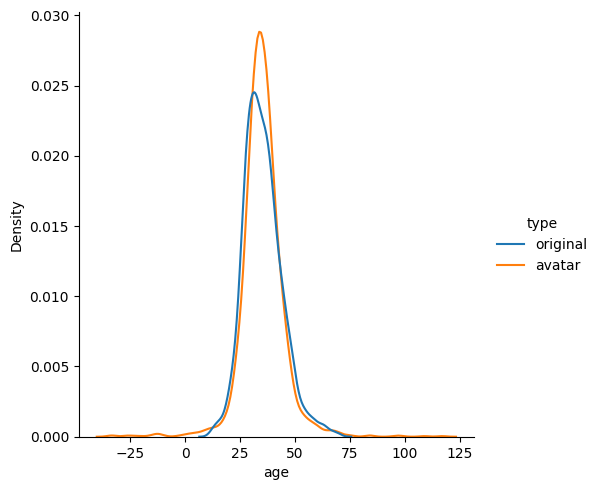

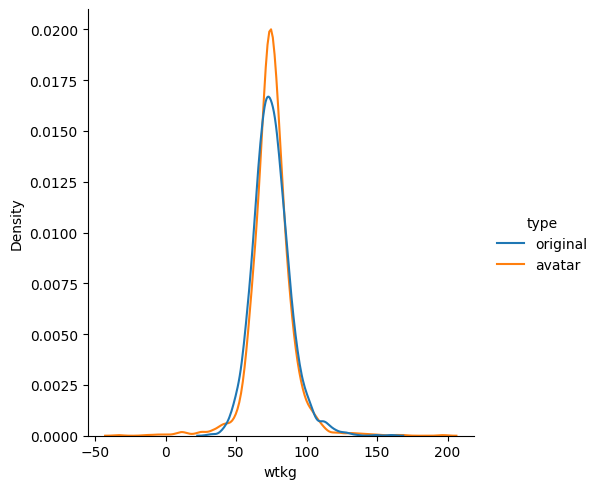

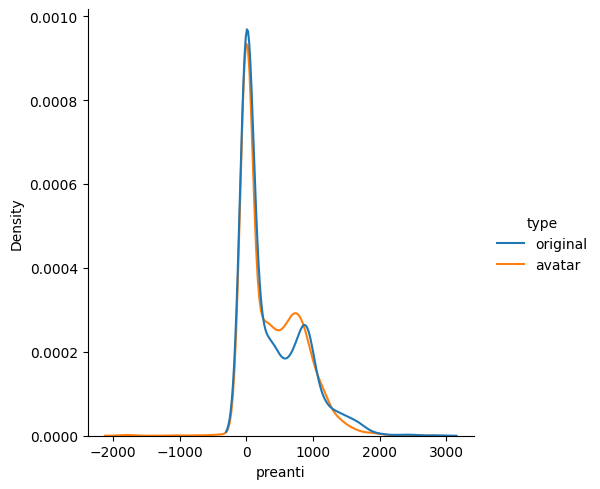

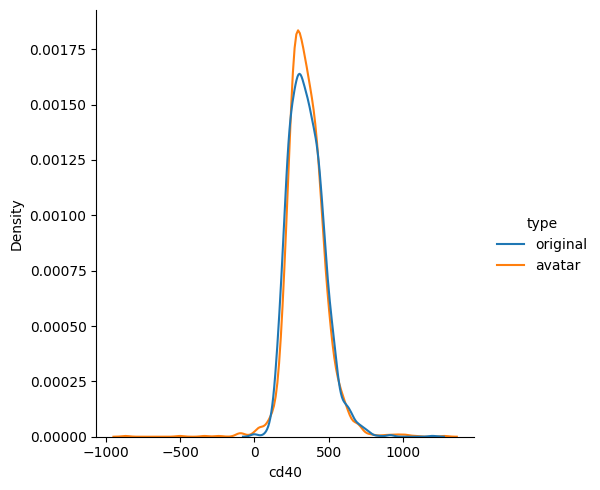

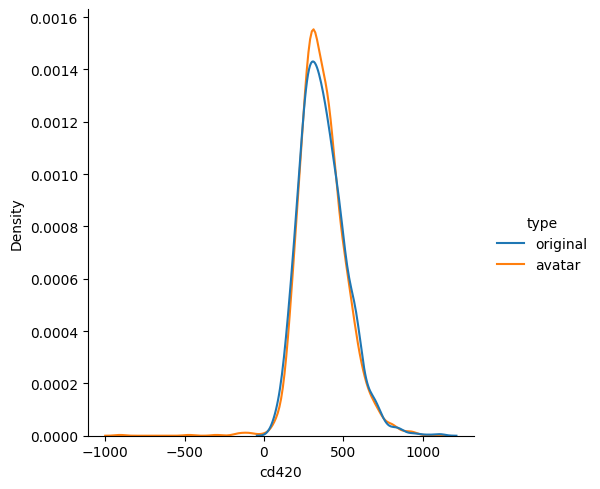

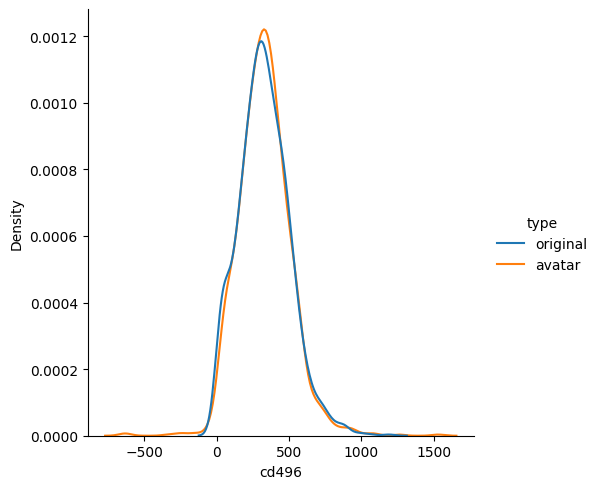

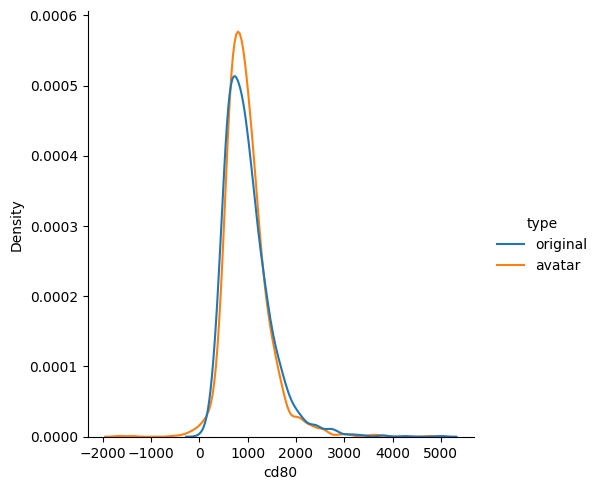

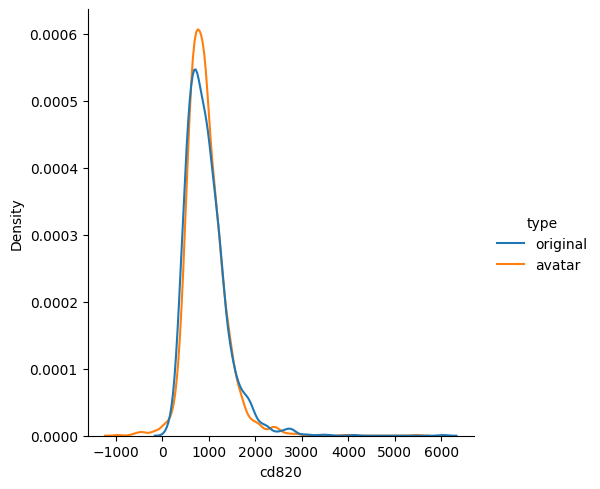

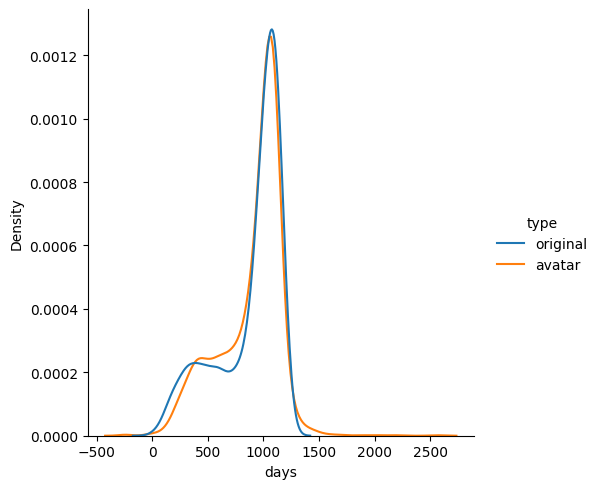

In [53]:
# Distribution continuous
for col in col_num:
    print(col)
    sns.displot(data=combined, x=col, hue="type", kind="kde")

hemo
homo
drugs
karnof
oprior
z30
zprior
race
gender
str2
strat
symptom
treat
offtrt
r
cens
arms
type


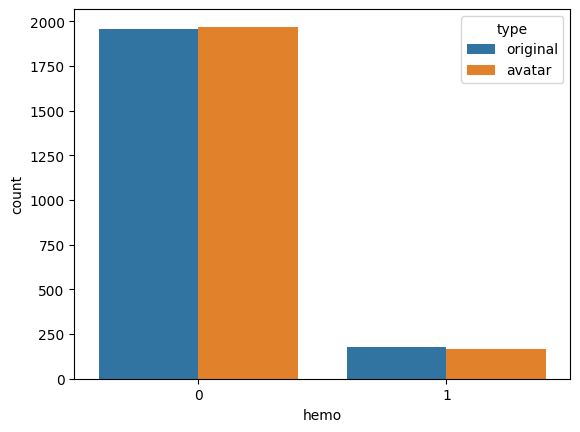

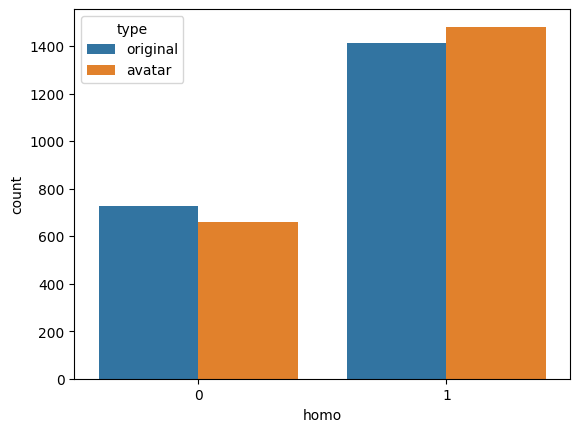

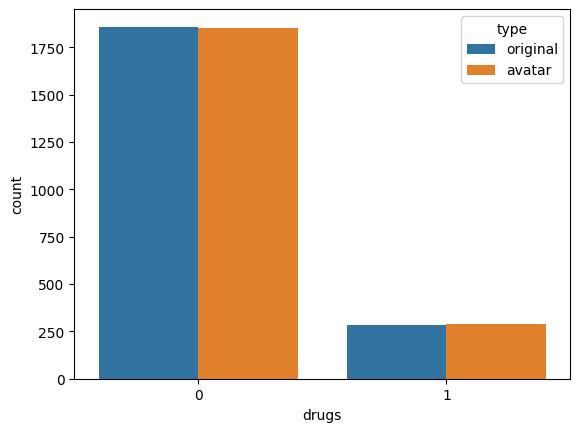

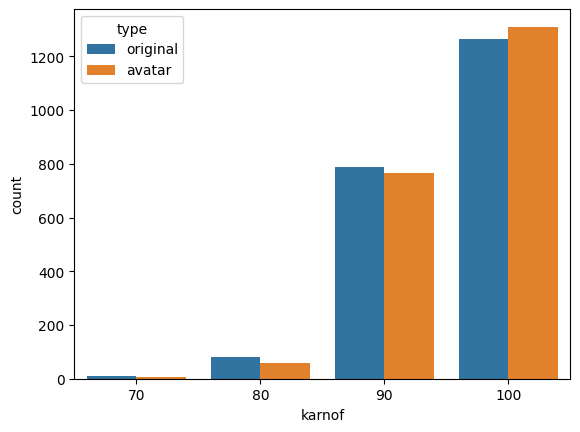

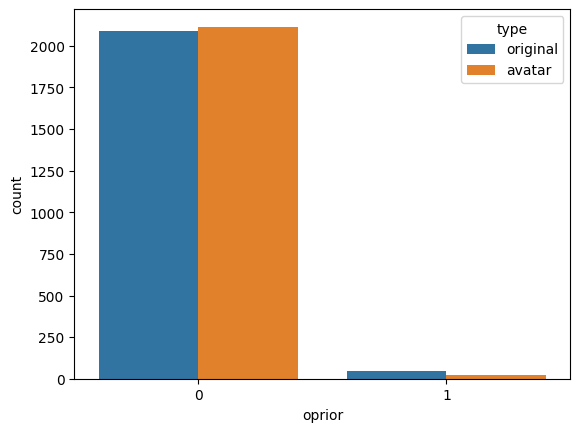

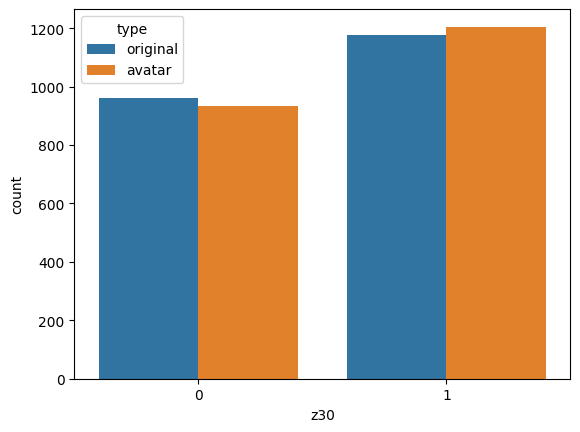

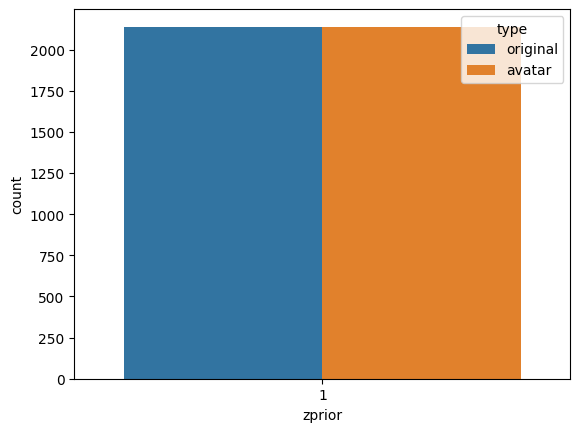

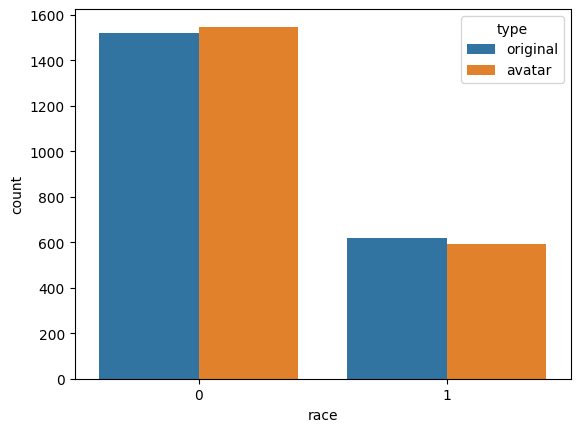

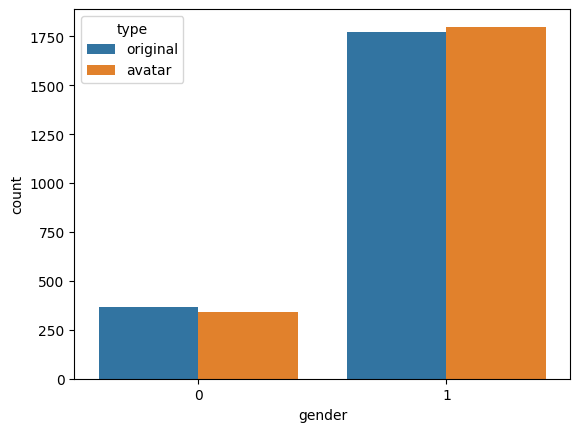

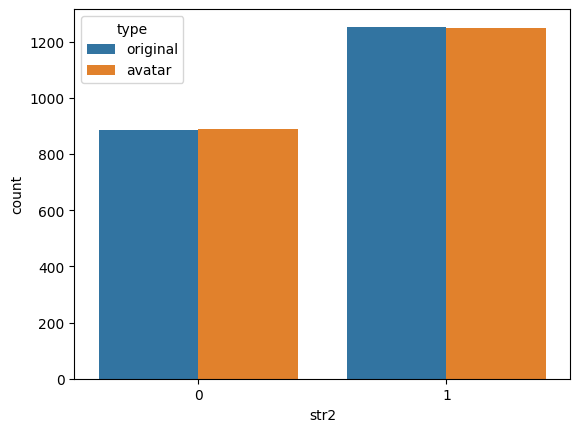

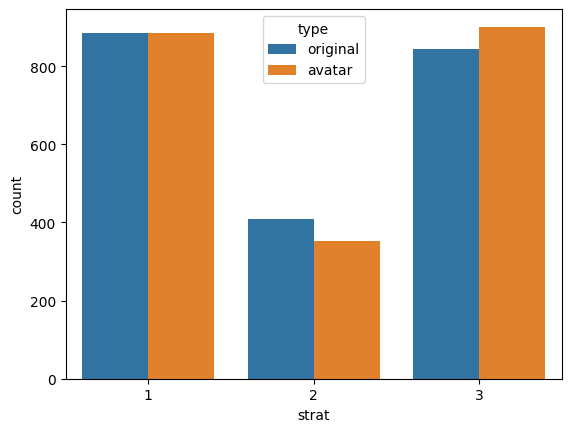

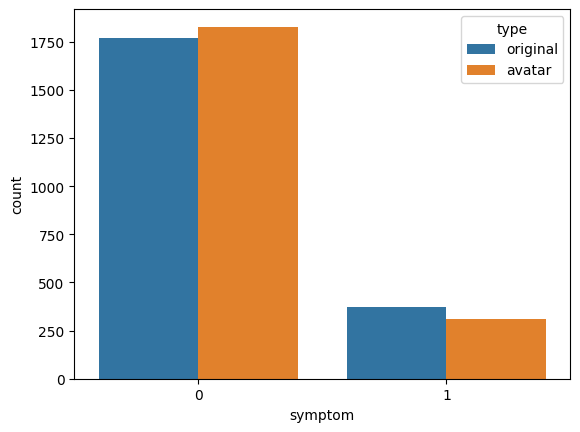

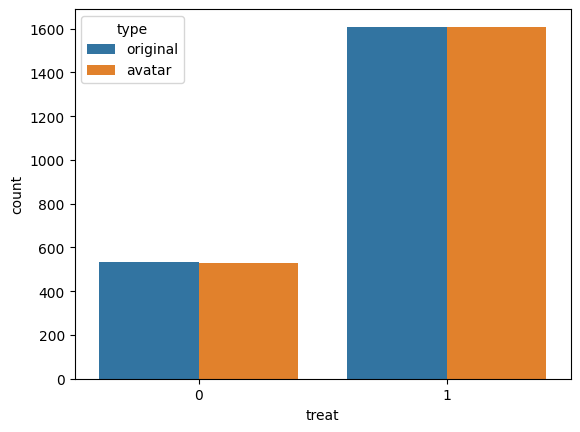

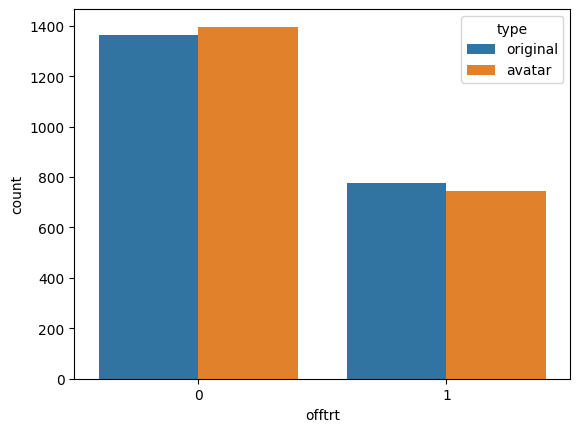

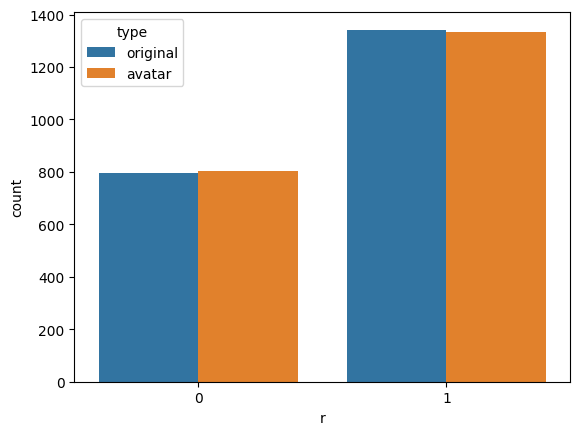

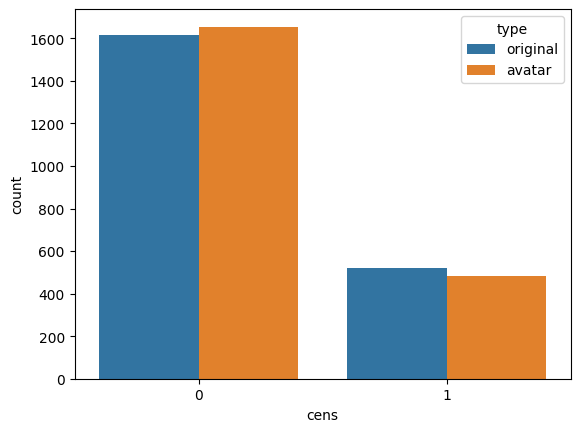

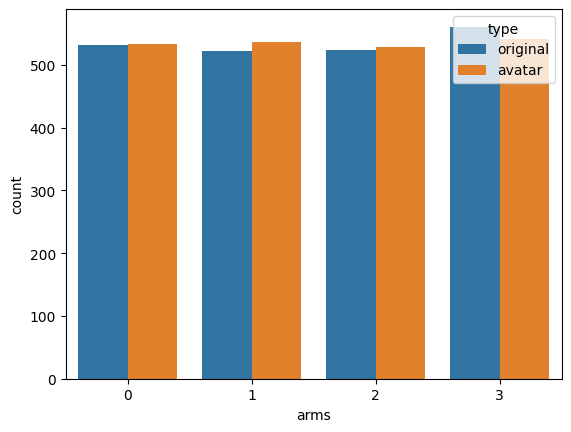

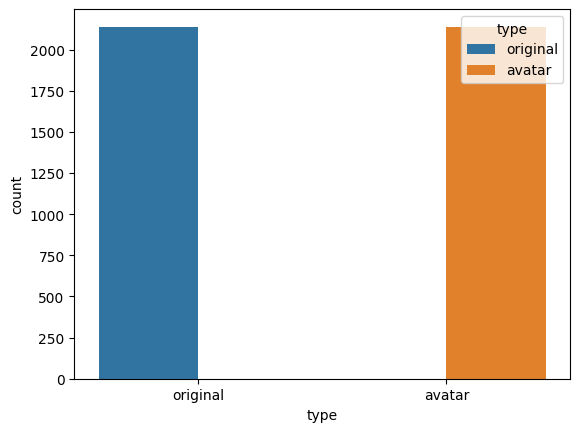

In [63]:
# Distribution categorical
for col in col_cat:
    print(col)
    plt.figure()
    ax = sns.countplot( data=combined, x=col, hue="type",)


#### Missing data
You are here comparing missing data between original and avatar data. 

If you want to improve the quality of missing data, you can use the parameter `imputation` in your avatarization.

The total number of missing values in avatar : 805
The total number of missing values in original : 797
The percentage of missing values in avatar: 29.814814814814813
The percentage of missing values in original: 29.51851851851852


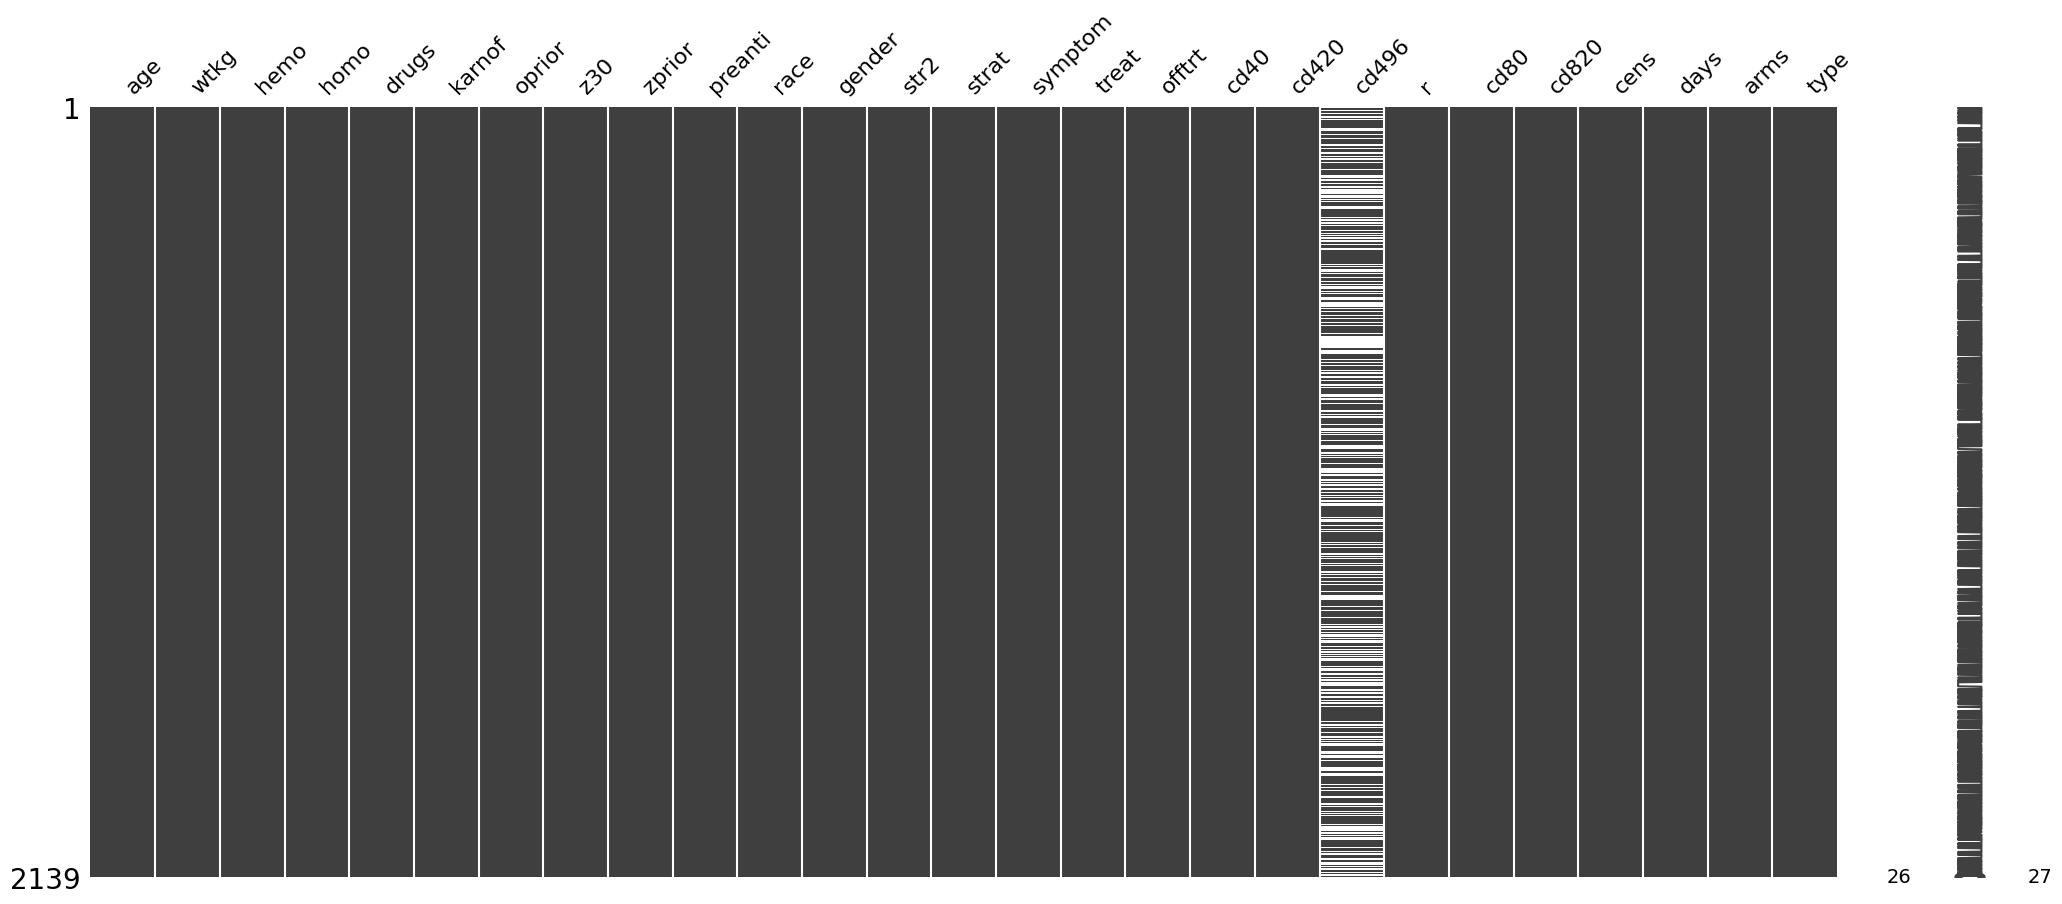

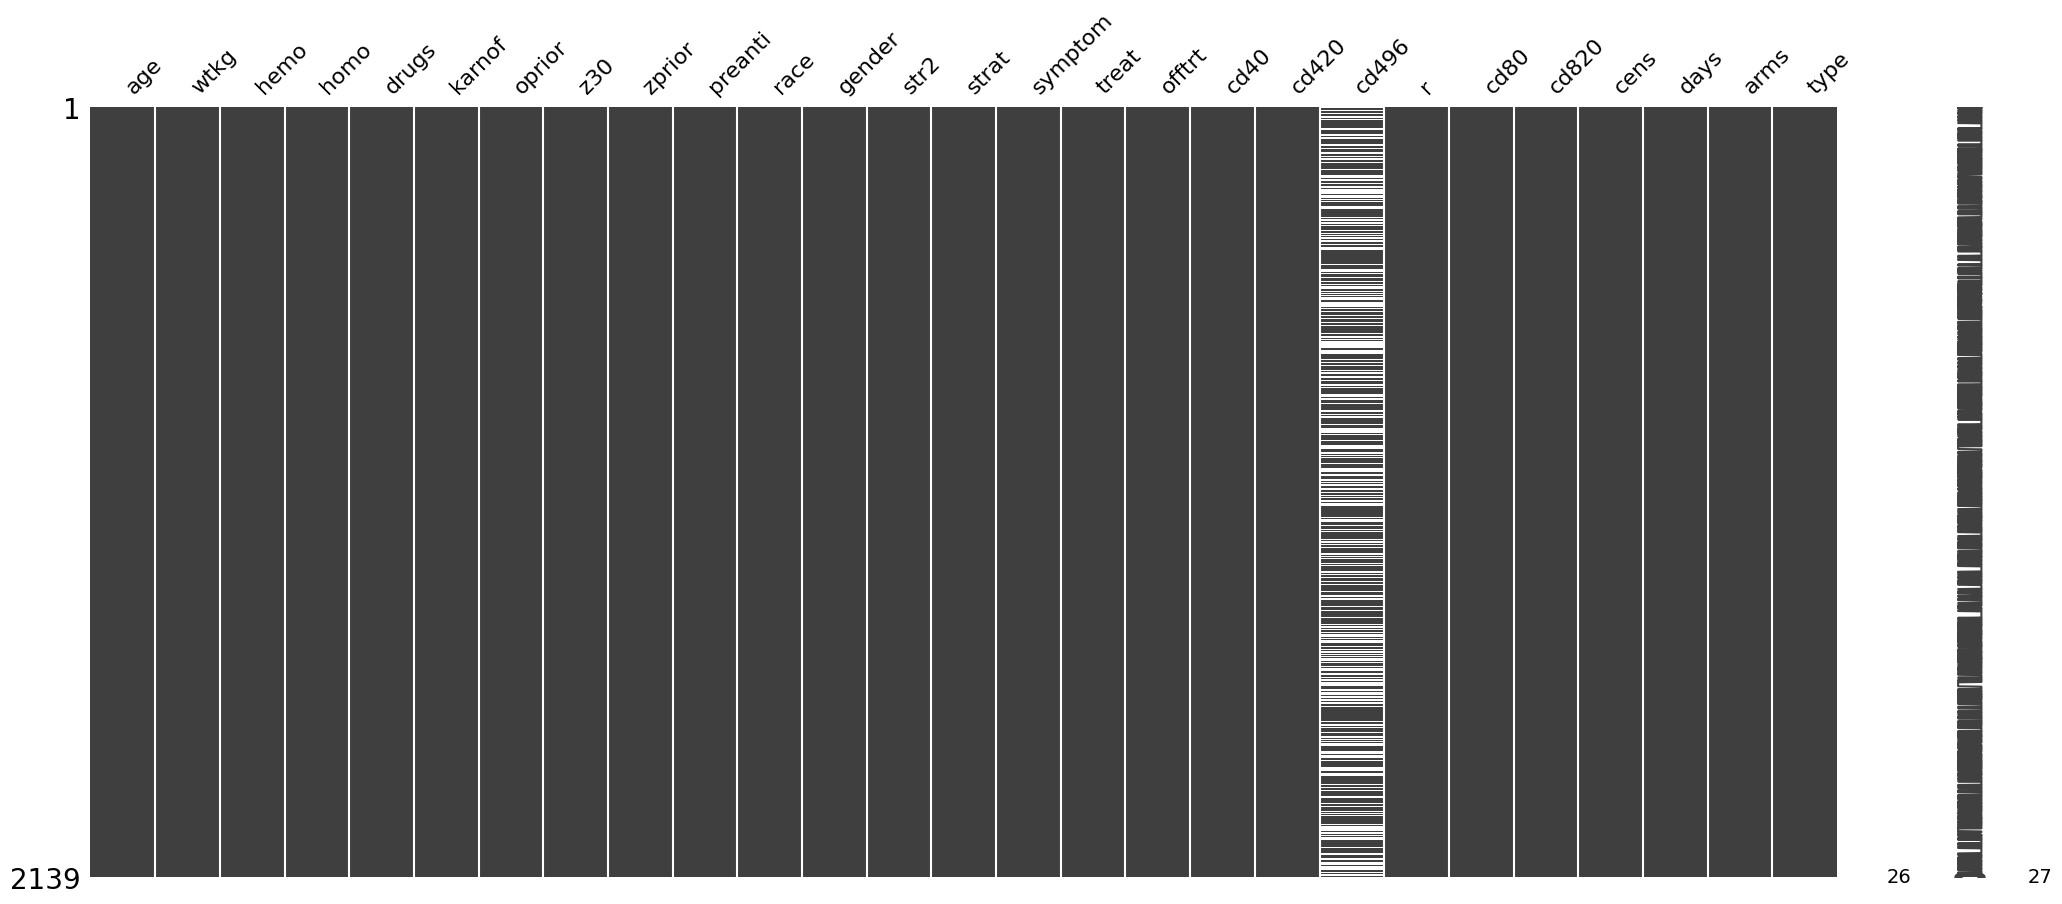

In [64]:
# Missng nan
msno.matrix(avatar)
msno.matrix(df)

print( f"The total number of missing values in avatar : {avatar.isna().values.sum()}")
print( f"The total number of missing values in original : {df.isna().values.sum()}")

avatar_missing_ratio =  avatar.isna().values.sum() /  avatar.count().count()
df_missing_ratio = df.isna().values.sum() / df.count().count()

print(f"The percentage of missing values in avatar: {avatar_missing_ratio}")
print(f"The percentage of missing values in original: {df_missing_ratio}")

## Bivariate comparison

We compare bivariate analysis. We are computing Pearson correlation. 

If you want to compare correlations between continuous and categorical variables, you can use Phik correlation (with the `phik` package).

If correlations are not well preserved during the avatarization, you can work with the `column_weight` parameter to add weight to your variables of interest.

<AxesSubplot:>

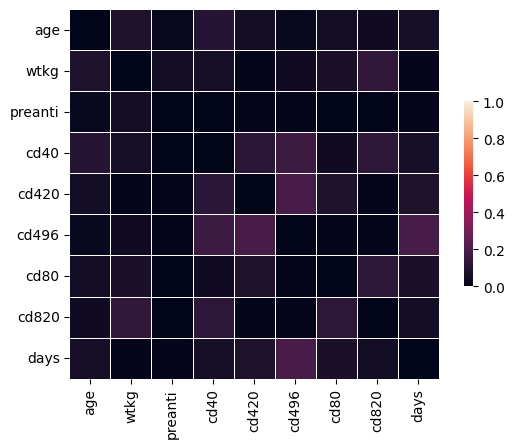

In [65]:
# correlation differences
original_corr = df.corr(method="pearson")
avatar_corr = avatar.corr(method="pearson")
corr_diff = abs(original_corr - avatar_corr).round(2)
sns.heatmap(
            corr_diff,
            vmax=1,
            vmin=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.5},
        )

## Multivariate comparison 

We compare multi-variate structures. 

In short, we are checking if the structure of the dataset is preserved. 

Datasets should have the same projection on the maximum of the dimensions.

If your projections are not well preserved, you can work with the `ncp` parameter of your avatarization.

In [67]:
# Projection
missing_columns = ["cd496"] # drop missing data to project
df_proj = df.drop(columns=missing_columns)
avatar_proj = avatar.drop(columns=missing_columns)

NB_IND = 1000 # number of individuals to fit the model.
model = saiph.fit(df_proj.sample(NB_IND).reset_index(drop=True), nf=5 )
coord_df = saiph.transform(df_proj, model)
coord_avatar = saiph.transform(avatar_proj, model)
coord_df

,Dim. 1,Dim. 2,Dim. 3,Dim. 4,Dim. 5
0,-2.185498,0.415888,1.983548,-0.666528,-1.429660
1,2.864962,-0.605240,1.324405,0.663586,-1.434625
2,1.087844,1.520075,-2.204851,1.765738,2.161844
3,1.701216,1.967306,-1.529584,0.219602,-0.252987
4,1.977810,0.846564,-1.209232,-3.250283,0.154028
...,...,...,...,...,...
2134,2.806054,-0.637766,2.265068,0.538034,-1.301287
2135,1.632124,-2.089875,0.749158,-1.037860,3.059191
2136,1.562908,2.219200,-0.212859,-0.108541,0.290990
2137,-0.812731,-2.915369,0.647363,-1.684722,0.994597


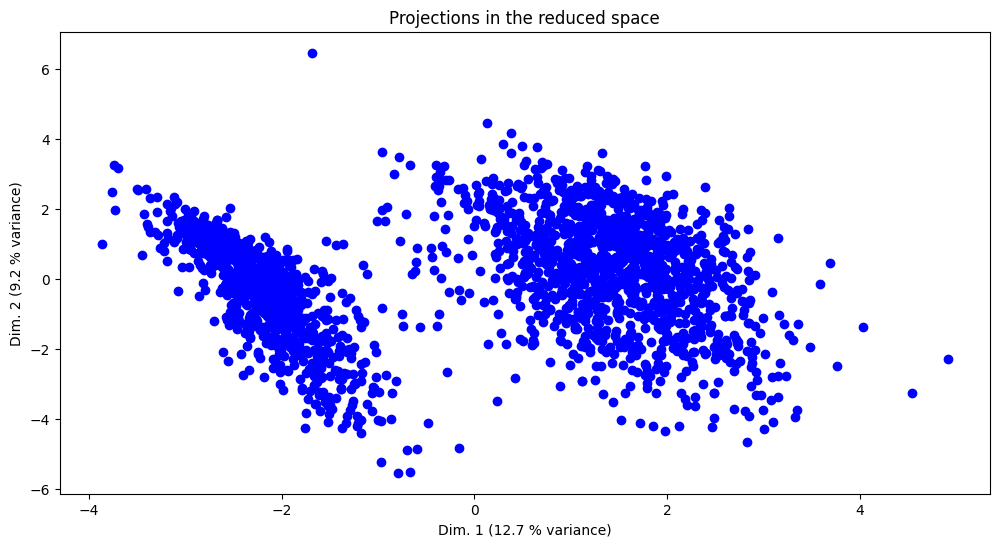

In [69]:
from saiph.visualization import plot_projections
plot_projections(model, df_proj)


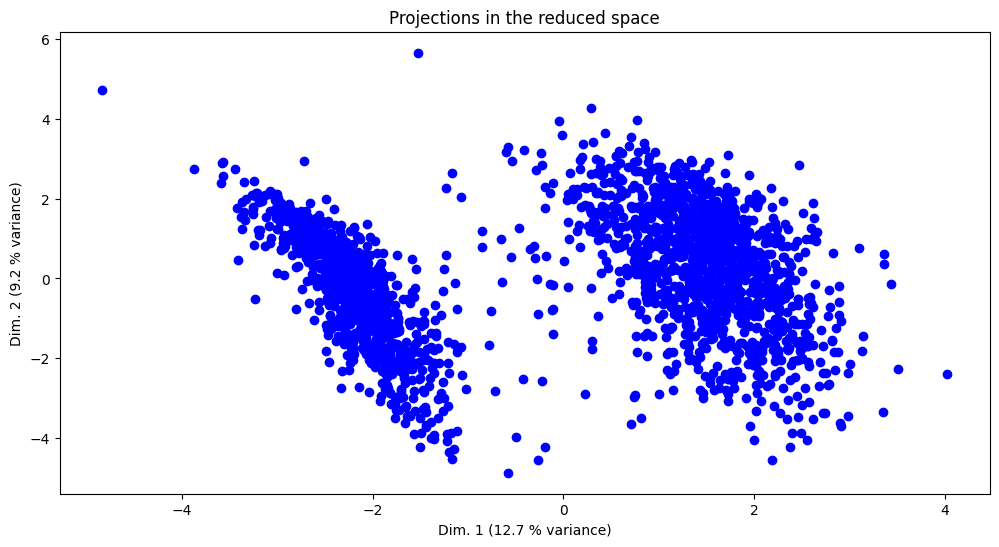

In [70]:
plot_projections(model, avatar_proj)